# Logistic regression

### Titanic Dataset

C:\Users\USER\AppData\Local\Temp\ipykernel_11200\1291338781.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(),inplace=True)


Accuracy: 82.02%


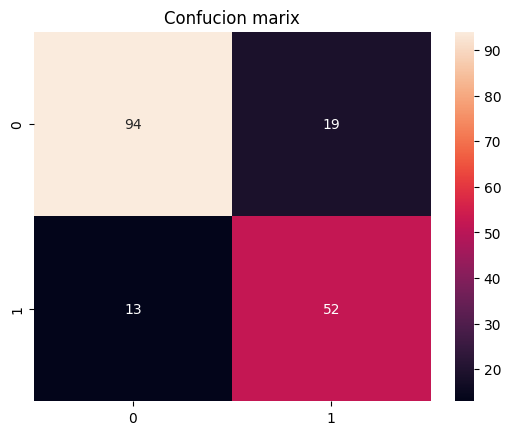

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.80      0.73      0.76        71

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt


titanic=sns.load_dataset('titanic')

titanic['age'].fillna(titanic['age'].median(),inplace=True)
titanic.dropna(subset=['embarked'],inplace=True)


titanic['sex']=titanic['sex'].map({'male':0,'female':1})

titanic=pd.get_dummies(titanic,columns=['embarked','pclass'],drop_first=True)


X = titanic[['age', 'sibsp', 'parch', 'fare', 'sex', 'embarked_Q', 'embarked_S']]
y=titanic['survived']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=11,test_size=0.2)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)



accuracy=accuracy_score(y_pred,y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


conf_matrx=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_matrx,annot=True)
plt.title("Confucion marix")
plt.show()

print(classification_report(y_test,y_pred))




### Spam Classification

In [4]:
df_spam=pd.read_csv("datasets/spam_classification_3col.csv")

df_spam["combined_text"]=df_spam["text_col_1"] + " " + df_spam["text_col_2"] + " " + df_spam["text_col_3"]

df_spam.head()

,text_col_1,text_col_2,text_col_3,label,combined_text
0,meeting schedule schedule discussion review,update meeting report meeting schedule,client meeting project review client,not_spam,meeting schedule schedule discussion review up...
1,money prize offer prize urgent,win free limited win offer,offer prize urgent prize credit,spam,money prize offer prize urgent win free limite...
2,reminder team client update review,update client discussion meeting schedule,schedule meeting schedule project schedule,not_spam,reminder team client update review update clie...
3,team team schedule schedule reminder,review review project discussion project,team reminder review client review,not_spam,team team schedule schedule reminder review re...
4,discussion schedule meeting team schedule,schedule reminder update team review,team reminder report schedule schedule,not_spam,discussion schedule meeting team schedule sche...


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report




# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df_spam["combined_text"], df_spam["label"], 
    test_size=0.2, random_state=42, stratify=df_spam["label"]
)

# Vectorize
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Evaluate
y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

    not_spam       1.00      1.00      1.00        30
        spam       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

